## Ignore the warnings!!

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Prioritized Variant Table from the healthy WES Sample NA12878

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

df = pd.read_csv("../results/prioritized_variants.tsv",
                 sep="\t",
                 header=None,
                 names=["CHROM","POS","REF","ALT","GENE","CONSEQUENCE","IMPACT",
        "HGVSc","HGVSp","AF","SIFT","POLYPHEN","CLIN_SIG"]
)

df.head()

,CHROM,POS,REF,ALT,GENE,CONSEQUENCE,IMPACT,HGVSc,HGVSp,AF,SIFT,POLYPHEN,CLIN_SIG
0,chr22,15528876,A,G,"OR11H1,.,.,.,.","missense_variant,intron_variant&non_coding_tra...","MODERATE,MODIFIER,MODIFIER,MODIFIER,MODIFIER","ENST00000643195.1:c.685A>G,ENST00000775238.1:n...","ENSP00000495403.1:p.Met229Val,.,.,.,.",".,.,.,.,.","tolerated_low_confidence(1),.,.,.,.","benign(0),.,.,.,.",".,.,.,.,."
1,chr22,15690673,A,G,"POTEH,POTEH","missense_variant,missense_variant&NMD_transcri...","MODERATE,MODERATE","ENST00000343518.11:c.596A>G,ENST00000452800.1:...","ENSP00000340610.6:p.Lys199Arg,ENSP00000442107....","0,0","tolerated(1),tolerated_low_confidence(1)","benign(0),benign(0.012)",".,."
2,chr22,15690694,A,G,"POTEH,POTEH","missense_variant,missense_variant&NMD_transcri...","MODERATE,MODERATE","ENST00000343518.11:c.617A>G,ENST00000452800.1:...","ENSP00000340610.6:p.Lys206Arg,ENSP00000442107....",".,.","tolerated(1),tolerated_low_confidence(1)","benign(0.007),benign(0.003)",".,."
3,chr22,15700206,G,A,"POTEH,RNU6-816P,POTEH-AS1,POTEH","missense_variant,upstream_gene_variant,non_cod...","MODERATE,MODIFIER,MODIFIER,MODIFIER","ENST00000343518.11:c.1157G>A,.,ENST00000422014...","ENSP00000340610.6:p.Arg386His,.,.,.","0.00152,0.00152,0.00152,0.00152","tolerated(1),.,.,.","benign(0),.,.,.",".,.,.,."
4,chr22,15700211,A,C,"POTEH,RNU6-816P,POTEH-AS1,POTEH","missense_variant,upstream_gene_variant,non_cod...","MODERATE,MODIFIER,MODIFIER,MODIFIER","ENST00000343518.11:c.1162A>C,.,ENST00000422014...","ENSP00000340610.6:p.Asn388His,.,.,.",".,.,.,.","tolerated(0.12),.,.,.","benign(0.007),.,.,.",".,.,.,."


## Variant Impact Distribution
*How severe are the variants in a healthy genome?*

In [4]:
impact_series = (
    df["IMPACT"]
    .str.split(",")
    .explode()
    .value_counts()
    .reset_index()
    
)

impact_series.columns = ["Impact", "Count"]
impact_series

,Impact,Count
0,MODERATE,1227
1,MODIFIER,784
2,HIGH,314
3,LOW,84


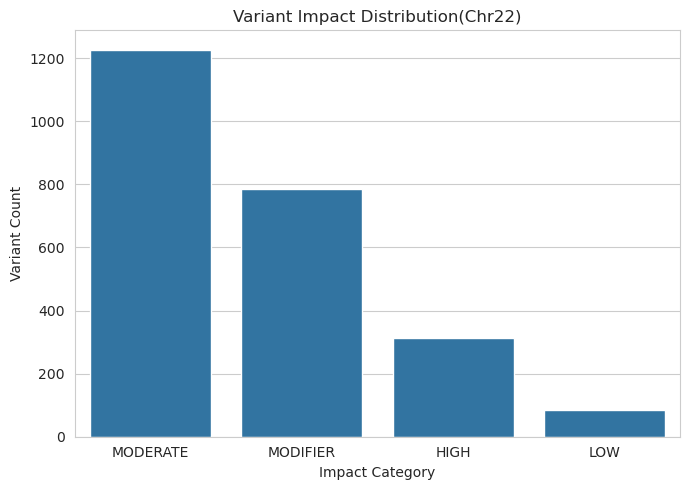

In [10]:
#Plot
plt.figure(figsize=(7,5))
sns.barplot(data=impact_series, x="Impact", y="Count")
plt.title("Variant Impact Distribution(Chr22)")
plt.xlabel("Impact Category")
plt.ylabel("Variant Count")
plt.tight_layout()
#Save the plot
plt.savefig('../results/Variant Impact Distribution.png', dpi=300, bbox_inches='tight')

plt.show()

## The dominance of MODERATE and MODIFIER variants is consistent with expected benign variation in healthy genomes.

## Top Variant-Carrying Gene
*Which genes accumulate the most variants?*

In [6]:
gene_counts=(
    df["GENE"]
    .str.split(",")
    .explode()
    .replace(".", pd.NA)
    .dropna()
    .value_counts()
    .head(10)
    .reset_index()
)

gene_counts.columns=["Gene", "Variant_count"]
gene_counts

,Gene,Variant_count
0,PPP6R2,516
1,ATF4,300
2,SBF1,252
3,EWSR1,168
4,ACO2,135
5,MYH9,110
6,ZNF74,99
7,MED15,82
8,XRCC6,74
9,GRAP2,56


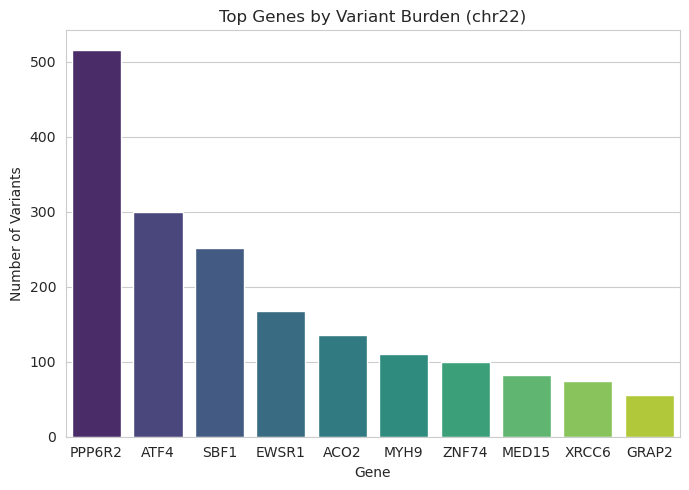

In [9]:
#Plot
plt.figure(figsize=(7,5))
sns.barplot(data=gene_counts, x="Gene", y="Variant_count", palette="viridis")
plt.title("Top Genes by Variant Burden (chr22)")
plt.xlabel("Gene")
plt.ylabel("Number of Variants")
plt.tight_layout()
#Save the plot
plt.savefig('../results/Top Genes by Variant Burden.png', dpi=300, bbox_inches='tight')

plt.show()

## Genes such as PPP6R2 and ATF4 show high variant burden, likely reflecting transcript complexity rather than pathogenicity.

## SIFT vs PolyPhen Functional Predictions
*Do computational predictors agree?*

In [11]:
#Clean the predictions
def clean_prediction(x):
    if pd.isna(x) or x == ".":
        return None
    return x.split("(")[0]
    
df["SIFT_clean"]=df["SIFT"].str.split(",").str[0].apply(clean_prediction)
df["POLYPHEN_clean"]=df["POLYPHEN"].str.split(",").str[0].apply(clean_prediction)

#Count the predictions
sift_count=df["SIFT_clean"].value_counts().reset_index()
poly_count=df["POLYPHEN_clean"].value_counts().reset_index()

sift_count.columns=["Prediction","Count"]
poly_count.columns=["Prediction","Count"]

In [12]:
sift_count

,Prediction,Count
0,tolerated_low_confidence,22
1,tolerated,18
2,deleterious_low_confidence,14
3,deleterious,10


In [13]:
poly_count

,Prediction,Count
0,benign,45
1,probably_damaging,8
2,possibly_damaging,6


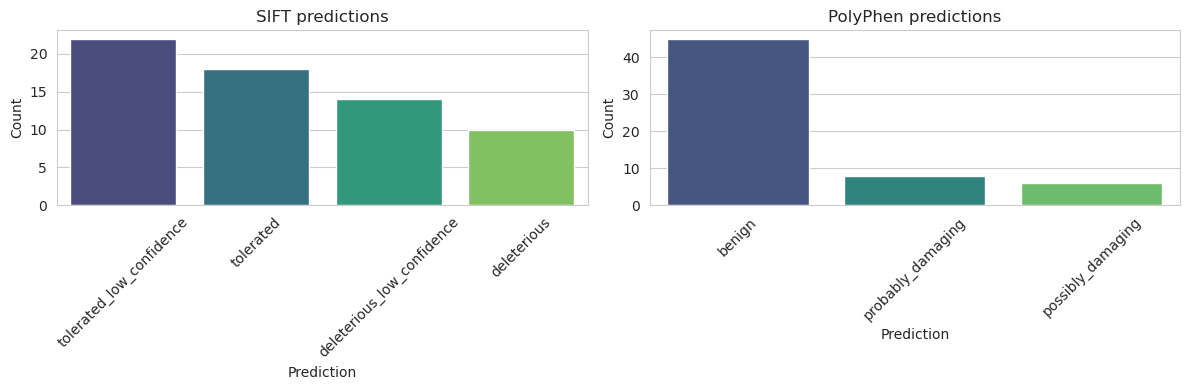

In [16]:
#Plot
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.barplot(data=sift_count, x="Prediction", y="Count", ax=axes[0], palette="viridis")
axes[0].set_title("SIFT predictions")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=poly_count, x="Prediction", y="Count", ax=axes[1], palette="viridis")
axes[1].set_title("PolyPhen predictions")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
#Save the plot
plt.savefig('../results/SIFTvsPOLYPHEN_prediction.png', dpi=300, bbox_inches='tight')
plt.show()

## Most variants are predicted as tolerated or benign, reinforcing a non-pathogenic baseline.

## Allele Frequency Spectrum
*Are these variants common or rare?*

In [17]:
#Prepare AF
df["AF_Numeric"]=pd.to_numeric(
    df["AF"].str.split(",").str[0],
    errors="coerce"
)
df_AF=df["AF_Numeric"]
df_AF

0           NaN
1      0.000000
2           NaN
3      0.001520
4           NaN
         ...   
110    0.000054
111    0.000002
112         NaN
113    0.000016
114    0.000011
Name: AF_Numeric, Length: 115, dtype: float64

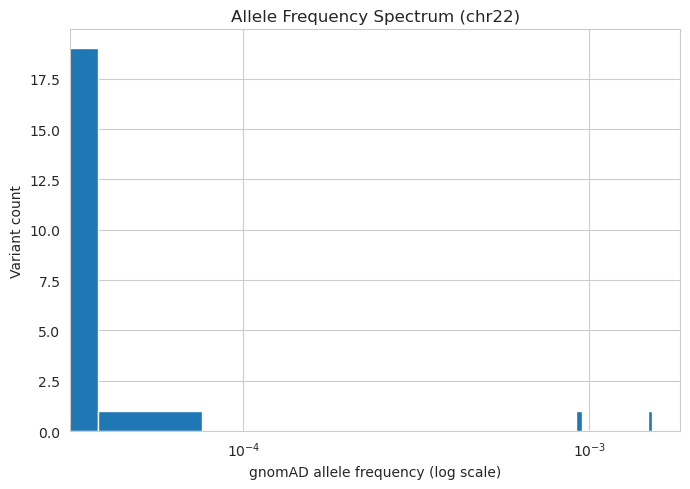

In [18]:
#Plot
plt.figure(figsize=(7,5))
plt.hist(df["AF_Numeric"].dropna(), bins=40)
plt.xscale("log")
plt.xlabel("gnomAD allele frequency (log scale)")
plt.ylabel("Variant count")
plt.title("Allele Frequency Spectrum (chr22)")
plt.tight_layout()
#Save the plot
plt.savefig('../results/Allele_Frequency_Spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

## This allele frequency (AF) spectrum shows how common or rare the observed chr22 variants are in the global human population (gnomAD), highlighting that most variants in a healthy individual are rare, emphasizing that rarity alone does not imply disease.

## Allele Frequency vs Impact

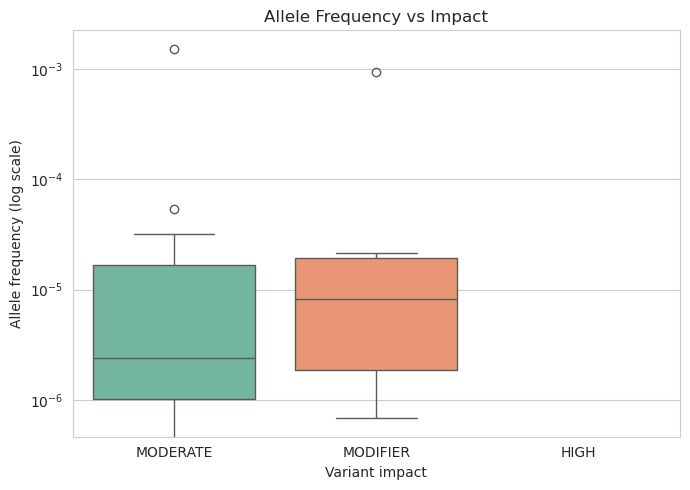

In [19]:
impact_af = df[["IMPACT","AF_Numeric"]].dropna()
impact_af["IMPACT"] = impact_af["IMPACT"].str.split(",").str[0]

plt.figure(figsize=(7,5))
sns.boxplot(data=impact_af, x="IMPACT", y="AF_Numeric", palette="Set2")
plt.yscale("log")
plt.title("Allele Frequency vs Impact")
plt.xlabel("Variant impact")
plt.ylabel("Allele frequency (log scale)")
plt.tight_layout()
#Save the plot
plt.savefig('../results/AFvsimpact.png', dpi=300, bbox_inches='tight')
plt.show()

## This plot shows the inverse relationship between predicted functional impact and population allele frequency. Variants with higher predicted impact tend to be rarer or absent due to purifying selection, while modifier variants are more frequent as they are mostly tolerated → selection doesn’t remove them strongly.

**Population frequency is shaped by natural selection, and functional impact predicts how strongly selection acts.**

## ClinVar significance overlaid on Impact vs Allele Frequency
*What are the ClinVar clinical interpretations for how the severe variant impacts relate to rarity in populations?*

In [20]:
#Clean + collapse categories:
def simplify_clinvar(x):
    if pd.isna(x) or x == ".":
        return "Not_reported"
    x = x.lower()
    if "pathogenic" in x:
        return "Pathogenic"
    elif "benign" in x:
        return "Benign"
    elif "uncertain" in x:
        return "VUS"
    else:
        return "Other"

df["ClinVar_simple"] = df["CLIN_SIG"].apply(simplify_clinvar)
df["ClinVar_simple"]

0      Other
1      Other
2      Other
3      Other
4      Other
       ...  
110      VUS
111      VUS
112    Other
113    Other
114    Other
Name: ClinVar_simple, Length: 115, dtype: object

In [21]:
#Define Impact priority
impact_priority = {
    "HIGH": 4,
    "MODERATE": 3,
    "LOW": 2,
    "MODIFIER": 1
}

#Extract the most severe impact
def get_most_severe_impact(impact_str):
    if pd.isna(impact_str) or impact_str == ".":
        return None
    impacts = impact_str.split(",")
    impacts = [i for i in impacts if i in impact_priority]
    if not impacts:
        return None
    return max(impacts, key=lambda x: impact_priority[x])

df["IMPACT_clean"] = df["IMPACT"].apply(get_most_severe_impact)
#Order the x-axis logically
impact_order = ["MODIFIER", "LOW", "MODERATE", "HIGH"]

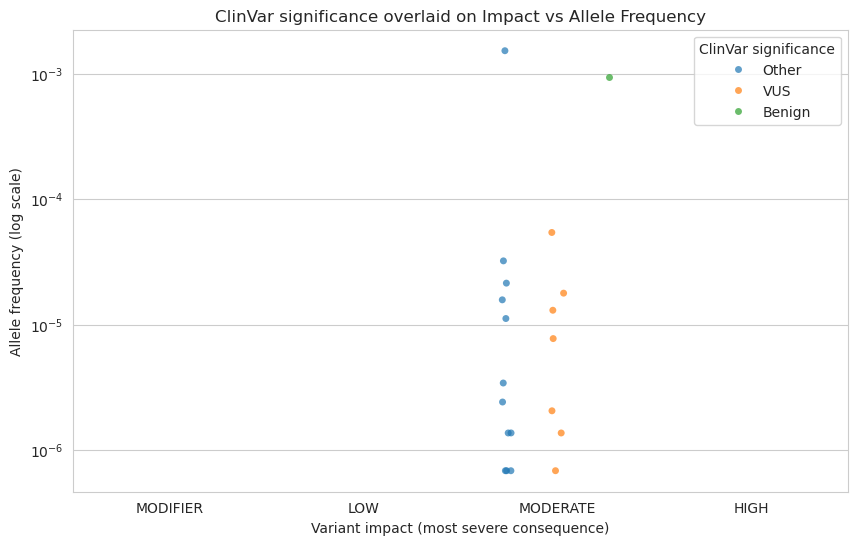

In [24]:
#Plot
plt.figure(figsize=(10,6))
sns.stripplot(
    x="IMPACT_clean",
    y="AF_Numeric",
    hue="ClinVar_simple",
    data=df,
    order=impact_order,
    jitter=True,
    dodge=True,
    alpha=0.7
)

plt.yscale("log")
plt.ylabel("Allele frequency (log scale)")
plt.xlabel("Variant impact (most severe consequence)")
plt.title("ClinVar significance overlaid on Impact vs Allele Frequency")
plt.legend(title="ClinVar significance")
#Save the plot
plt.savefig('../results/Clinvar_significance.png', dpi=300, bbox_inches='tight')
plt.show()

## This plot demonstrates the inverse relationship between functional severity and population frequency, with ClinVar annotations reinforcing that rare, moderate-impact variants are enriched for uncertainty, while common variants are overwhelmingly benign.
**Clinical variant databases are enriched for variants that are both biologically impactful and observable in humans, so MODERATE-impact variants sit exactly at that intersection because missense variants are frequent enough to be observed in patients while still altering protein function in a clinically interpretable manner.**

## *Check the gene with the highest variant burden*

In [23]:
ppp6r2 = df[df["GENE"].str.contains("PPP6R2", na=False)]
ppp6r2[[
    "CHROM", "POS", "REF", "ALT",
    "CONSEQUENCE", "IMPACT", "HGVSc", "HGVSp",
    "AF","SIFT","POLYPHEN", "CLIN_SIG"
]]

,CHROM,POS,REF,ALT,CONSEQUENCE,IMPACT,HGVSc,HGVSp,AF,SIFT,POLYPHEN,CLIN_SIG
103,chr22,50440816,T,C,"missense_variant,splice_region_variant&splice_...","MODERATE,LOW,MODIFIER,LOW,LOW,LOW,LOW,MODIFIER...","ENST00000216061.9:c.2390T>C,ENST00000359139.7:...","ENSP00000216061.5:p.Phe797Ser,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...","deleterious_low_confidence(0.03),.,.,.,.,.,.,....","benign(0.003),.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,..."
104,chr22,50440842,G,A,"missense_variant,missense_variant,downstream_g...","MODERATE,MODERATE,MODIFIER,MODERATE,MODERATE,M...","ENST00000216061.9:c.2416G>A,ENST00000359139.7:...","ENSP00000216061.5:p.Ala806Thr,ENSP00000352051....",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...","deleterious_low_confidence(0.02),deleterious_l...","benign(0.38),possibly_damaging(0.468),.,possib...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,..."
105,chr22,50440845,T,TCC,"frameshift_variant,frameshift_variant,downstre...","HIGH,HIGH,MODIFIER,HIGH,HIGH,HIGH,HIGH,MODIFIE...","ENST00000216061.9:c.2419_2420insCC,ENST0000035...","ENSP00000216061.5:p.Trp807SerfsTer39,ENSP00000...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,..."
106,chr22,50440846,G,GT,"frameshift_variant,frameshift_variant,downstre...","HIGH,HIGH,MODIFIER,HIGH,HIGH,HIGH,HIGH,MODIFIE...","ENST00000216061.9:c.2420_2421insT,ENST00000359...","ENSP00000216061.5:p.Trp807CysfsTer15,ENSP00000...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,..."
107,chr22,50440848,A,T,"missense_variant,missense_variant,downstream_g...","MODERATE,MODERATE,MODIFIER,MODERATE,MODERATE,M...","ENST00000216061.9:c.2422A>T,ENST00000359139.7:...","ENSP00000216061.5:p.Asn808Tyr,ENSP00000352051....",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...","deleterious_low_confidence(0),deleterious_low_...","possibly_damaging(0.656),possibly_damaging(0.8...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,..."
108,chr22,50440849,A,ACCTC,"frameshift_variant,frameshift_variant,downstre...","HIGH,HIGH,MODIFIER,HIGH,HIGH,HIGH,HIGH,MODIFIE...","ENST00000216061.9:c.2424_2425insCTCC,ENST00000...","ENSP00000216061.5:p.Val809LeufsTer14,ENSP00000...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,...",".,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,..."


### PPP6R2 variant summary**By comparing the gene having the highest variant burden on chromosome 22, its functional impact, and its population frequency profile against the chromosome-wide background, it was found that while the global dataset was dominated by MODIFIER and common variants, the high-burden gene showed enrichment for MODERATE/HIGH impact variants with lower allele frequencies, suggesting increased functional constraint.**


Shown above are altheed variants identified in **PPP6R2**, the most variant-dense gene in this dataset
Key observations:
- The variants are predominantly **protein-altering**, including multiple **missense** and **frameshift (HIGH impact)** consequences.
- Several variants cluster within a narrow genomic region, suggesting localized sequence variability rather than random distribution.Vt variants lack reported pathogenic assertions in **ClinVar** and are either absent or extremely rare in **gnomAD**, consistent with background human variation.
- The presence of HIGH-impact annotations (e.g., frameshift variants) in a healthy individual highlights the distinction between **predicted functional impact** and **clinical pathogenicity**.
- Multiple consequ, impacts, etc.ences per variant reflect **transcript-level annotation complexity**, emphasizing the importance of transcript-aware interpretat
Overall, this gene-level view demonstrates how variant burden analysis, when combined with population frequency and clinical databases, can guide biologically informed prioritization without overinterpretatio and illustrates how predicted impact alone is insufficient for pathogenic interpretation in the absence of phenotype data.

No additional prioritization or pathogenic filtering was applied at this stage. Instead, this view is intended to illustrate the raw variant burden and annotation diversity within a single gene and to highlight the challenges of interpreting predicted functional impact in the absence of phenotype-driven or clinical classification frameworks.dividuals.
